In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [27]:
import pandas as pd

from lint.models import Token

series = Token.token_series('the')

df = pd.DataFrame(
    list(series.items()),
    columns=('offset', 'count'),
)

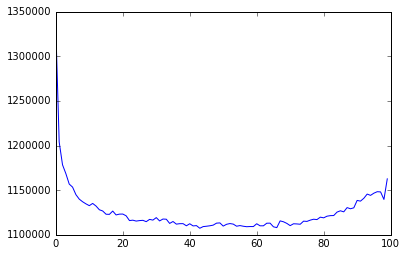

In [39]:
plt.plot(df['offset'], df['count'])
plt.show()

In [59]:
from patsy import dmatrices

y, X = dmatrices(
    'count ~ offset + I(offset**2) + I(offset**3)',
    data=df,
    return_type='dataframe',
)

In [60]:
import statsmodels.api as sm

mod = sm.OLS(y, X)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     49.88
Date:                Sun, 23 Oct 2016   Prob (F-statistic):           1.61e-19
Time:                        00:11:58   Log-Likelihood:                -1113.5
No. Observations:                 100   AIC:                             2235.
Df Residuals:                      96   BIC:                             2245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.191e+06   6525.693    182.538      0.000      1.18e+06   1.2e+06
offset         -4599.2247    573.727     -8.016      0.000     -5738.064 -3460.385
I(offset ** 2)    73.2419     13.505      5.423      0.000        46.435   100.049
I(offset ** 3)    -0.3218      0.090     -3.589      0.001        -0.500    -0.144
==============================================================================
Omnibus:                      161.590   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10498.967
Skew:                           5.959   Prob(JB):                         0.00
Kurtosis:                      51.762   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

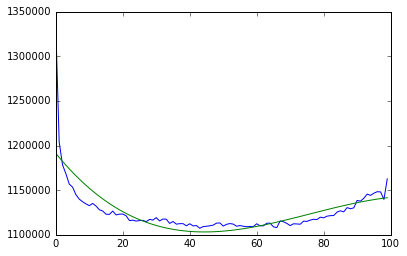

In [61]:
plt.plot(df['offset'], df['count'])
plt.plot(df['offset'], res.fittedvalues)
plt.show()